In [1]:
import keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, MaxPool2D
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
from tensorflow.keras import datasets, layers, models, losses
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

In [2]:
train_set = pd.read_csv('Messidor Dataset/aug_train_label.csv')    # reading the csv file
train_set.head() 

,Image,Id,Risk of Macular Edema
0,20051019_38557_0100_PP.tif_0_1898.tif,2,0
1,20051019_38557_0100_PP.tif_0_3322.tif,2,0
2,20051019_38557_0100_PP.tif_0_4844.tif,2,0
3,20051019_38557_0100_PP.tif_0_5319.tif,2,0
4,20051019_38557_0100_PP.tif_0_687.tif,2,0


In [3]:
train_set.columns

Index(['Image', 'Id', 'Risk of Macular Edema'], dtype='object')

In [4]:
train_image = []

for i in tqdm(range(train_set.shape[0])):
    img = image.load_img('Messidor Dataset/aug_train/' + train_set['Image'][i],target_size=(224,224,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)

X = np.array(train_image)

100%|██████████████████████████████████████████████████████████████████████████████| 5760/5760 [08:34<00:00, 11.20it/s]


In [5]:
X.shape

(5760, 224, 224, 3)

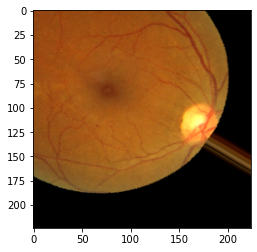

In [6]:
plt.imshow(X[2])

In [7]:
train_set['Id'][2]

2

In [8]:
test_set =  pd.read_csv('Messidor Dataset/test.csv')    # reading the csv file
test_set.head() 

,Image,Id,Risk of macular edema
0,20060410_44464_0200_PP.tif,0,0
1,20051213_61892_0100_PP.tif,0,0
2,20051020_53062_0100_PP.tif,3,2
3,20051116_58835_0400_PP.tif,3,1
4,20051214_51811_0100_PP.tif,3,1


In [9]:
test_set.columns

Index(['Image', 'Id', 'Risk of macular edema '], dtype='object')

In [10]:
test_image = []

for i in tqdm(range(test_set.shape[0])):
    img = image.load_img('Messidor Dataset/test/' + test_set['Image'][i],target_size=(224,224,3))
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)

Y = np.array(test_image)

100%|████████████████████████████████████████████████████████████████████████████████| 240/240 [00:18<00:00, 13.21it/s]


In [11]:
Y.shape

(240, 224, 224, 3)

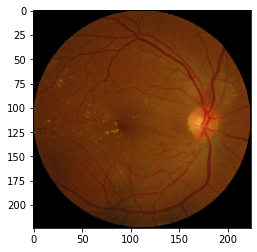

In [12]:
plt.imshow(Y[2])

In [13]:
y = np.array(train_set.drop(['Image', 'Risk of Macular Edema'],axis=1))
y.shape

(5760, 1)

In [14]:
print(X.shape)
print(Y.shape)
print(y.shape)

(5760, 224, 224, 3)
(240, 224, 224, 3)
(5760, 1)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5184, 224, 224, 3)
(576, 224, 224, 3)
(5184, 1)
(576, 1)


In [16]:
vgg16_model = tf.keras.applications.VGG16(
              include_top=True,
              weights="imagenet",
              input_tensor=None,
              input_shape=(224,224,3),
              pooling=None,
              classes=1000,
              classifier_activation="softmax",
          )

In [21]:
type(vgg16_model)
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [17]:
model = Sequential()
#model.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=x_train.shape[1:]))
for layer in vgg16_model.layers[:-1]:
    model.add(layer)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [18]:
for layer in model.layers:
    layer.trainable = False

#model.add(MaxPool2D(pool_size=(2, 2)))
#model.add(Flatten())
#model.add(Dense(units=4096,activation="relu"))
#model.add(Dense(units=4096,activation="relu"))
model.add(Dense(4,activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [19]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
print("Hyperparameters : {} \n".format(model.optimizer.get_config()))

Hyperparameters : {'name': 'Adam', 'learning_rate': 0.001, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False} 



In [20]:
history = model.fit(X_train, y_train,
          batch_size=4,
          epochs=7,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/7
1296/1296 [==============================] - 2378s 2s/step - loss: 1.6123 - accuracy: 0.3434 - val_loss: 1.8272 - val_accuracy: 0.4549
Epoch 2/7
1296/1296 [==============================] - 2354s 2s/step - loss: 1.6166 - accuracy: 0.3507 - val_loss: 1.9835 - val_accuracy: 0.3872
Epoch 3/7
1296/1296 [==============================] - 2351s 2s/step - loss: 1.6073 - accuracy: 0.3493 - val_loss: 1.5588 - val_accuracy: 0.4549
Epoch 4/7
1296/1296 [==============================] - 2339s 2s/step - loss: 1.6583 - accuracy: 0.3476 - val_loss: 1.4110 - val_accuracy: 0.4427
Epoch 5/7
1296/1296 [==============================] - 2372s 2s/step - loss: 1.5938 - accuracy: 0.3578 - val_loss: 1.7151 - val_accuracy: 0.2448
Epoch 6/7
1296/1296 [==============================] - 2338s 2s/step - loss: 1.6194 - accuracy: 0.3627 - val_loss: 1.3826 - val_accuracy: 0.4045
Epoch 7/7
1296/1296 [==============================] - 2407s 2s/step - loss: 1.6046 - accuracy: 0.3671 - val_loss: 2.9631 - val_ac

In [21]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Hyperparameters : {} \n".format(model.optimizer.get_config()))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Hyperparameters : {'name': 'Adam', 'learning_rate': 0.001, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False} 

Test loss: 2.9630534648895264
Test accuracy: 0.1892361044883728


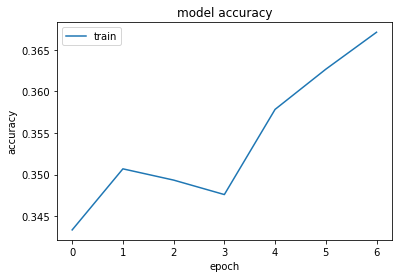

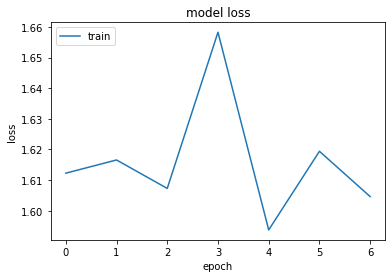

In [22]:
#Plotting the graph of accuracy VS epoch
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

#Plotting the graph of loss VS epoch
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [23]:
import sklearn.metrics as metrics
import seaborn as sn

#y_predict=model.predict(X_test)
"""matrix = metrics.confusion_matrix(y_test.argmax(axis=1), y_predict.argmax(axis=1))
#y_true=y_test
#res = tf.math.confusion_matrix(y_true,y_predict)
'''
plot_confusion_matrix(classifier, X_test, y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             normalize=normalize)'''
ieee 
plt.figure(figsize = (10,7))
sn.heatmap(matrix,annot=True,fmt='d')
plt.xlabel('Predicted value')
plt.ylabel('Truth')"""

"matrix = metrics.confusion_matrix(y_test.argmax(axis=1), y_predict.argmax(axis=1))\n#y_true=y_test\n#res = tf.math.confusion_matrix(y_true,y_predict)\n'''\nplot_confusion_matrix(classifier, X_test, y_test,\n                             display_labels=class_names,\n                             cmap=plt.cm.Blues,\n                             normalize=normalize)'''\nieee \nplt.figure(figsize = (10,7))\nsn.heatmap(matrix,annot=True,fmt='d')\nplt.xlabel('Predicted value')\nplt.ylabel('Truth')"

In [24]:
y_predict=model.predict(X_test)

In [26]:
matrix = metrics.confusion_matrix(y_test.argmax(axis=1), y_predict.argmax(axis=1))
matrix

array([[  0, 576],
       [  0,   0]], dtype=int64)

Text(69.0, 0.5, 'Truth')

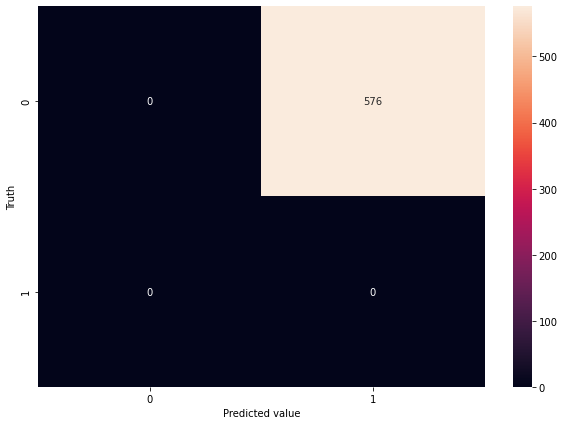

In [27]:
plt.figure(figsize = (10,7))
sn.heatmap(matrix,annot=True,fmt='d')
plt.xlabel('Predicted value')
plt.ylabel('Truth')

In [29]:
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

NameError: name 'class_names' is not defined

In [ ]:
matrix

array([[94,  2],
       [ 0,  0]])

In [ ]:
#Calculating evaluation metrics of the model
cf_m = matrix
#print(cf_m)

true_positive = []
true_negative = []
false_positive = []
false_negative = []


for i in range(2):
    for j in  range(2):
        if i==j:
            true_positive.append(cf_m[i][j])

print("True positive of values from 0 to 9 : {}".format(true_positive))

total_val = 0
for i in range(2):
    for j in  range(2):
        total_val += cf_m[i][j]
            
for i in range(2):
    for j in  range(2):
        sum_val = 0
        if i!=j:
            sum_val += int(cf_m[i][j])
        false_negative.append(sum_val)
        
for i in range(2):
    for j in  range(2):
        sum_val = 0
        if i!=j:
            sum_val += cf_m[j][i]
        false_positive.append(sum_val)


false_negative_list = []
i = 0
while(i<len(false_negative)):
    count = 0
    val = 0
    while(count<2):
        val = val + false_negative[i]
        i = i+1
        count = count+1
    false_negative_list.append(val)
    
print("False negative of values from 0 to 9 : {}".format(false_negative_list))

false_positive_list = []
i = 0
while(i<len(false_positive)):
    count = 0
    val = 0
    while(count<2):
        val = val + false_positive[i]
        i = i+1
        count = count+1
    false_positive_list.append(val)

print("False positive of values from 0 to 9 : {}".format(false_positive_list))

for i in range(2):
    val = total_val - false_positive_list[i] - false_negative_list[i] - true_positive[i]
    true_negative.append(val)



print("True negative of values from 0 to 9 : {}".format(true_negative))


True positive of values from 0 to 9 : [94, 0]
False negative of values from 0 to 9 : [2, 0]
False positive of values from 0 to 9 : [0, 2]
True negative of values from 0 to 9 : [0, 94]


In [ ]:
sensitivity = []
specificity = []
precision = []
F1_score = []

for i in range(2):
    sensitivity_val = round(true_positive[i] / (true_positive[i] + false_negative_list[i]),2)
    sensitivity.append(sensitivity_val)
    
    specificity_val = round((true_negative[i] / (false_positive_list[i] +  true_negative[i])),2)
    specificity.append(specificity_val)
    
    precision_val = round((true_positive[i]/ (true_positive[i] + false_positive_list[i])),2)
    precision.append(precision_val)
    
    #F1_val = round(2*((sensitivity_val*precision_val)/(sensitivity_val+precision_val)))
    #F1_score.append(F1_val)
    
evaluation_metrices = []
num_list = [0,1]

evaluation_metrices.append(num_list)
evaluation_metrices.append(sensitivity)
evaluation_metrices.append(specificity)
evaluation_metrices.append(precision)
#evaluation_metrices.append(F1_score)
    
print(evaluation_metrices)    

[[0, 1], [0.98, nan], [nan, 0.98], [1.0, 0.0]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys


In [ ]:
[list(i) for i in zip(*evaluation_metrices)]

[[0, 0.98, nan, 1.0], [1, nan, 0.98, 0.0]]